# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('datasets//Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

<H1>PART 2 ANSWERS AND INSIGHTS:</H1>

In [3]:
unique_job_titles_count = df['job_title'].nunique()
unique_job_titles_count

93

<hr>
<H3>Insight: There are 93 unique job titles in the dataset.</H3>
<hr>

In [4]:
avg_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean().round(2).reset_index()
avg_salary_per_year

,work_year,salary_in_usd
0,2020,92302.63
1,2021,94087.21
2,2022,133379.51
3,2023,148954.56


<hr>
<H3>Insight: The average salary salary_in_usd has shown a consistent increase over the years</H3>
<hr>

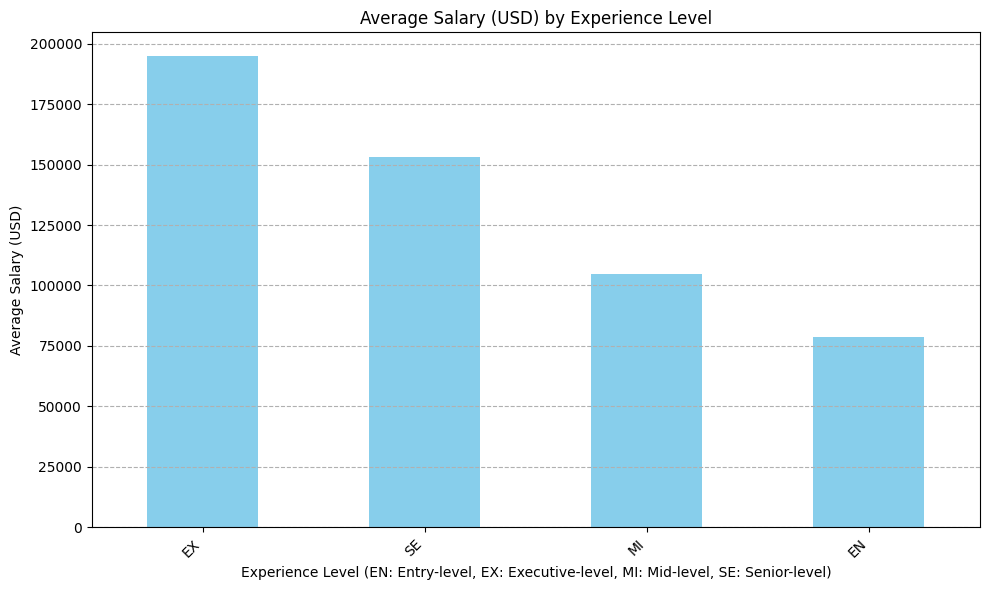

In [5]:
avg_salary_per_experience = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_salary_per_experience.plot(kind='bar', color='skyblue')
plt.title('Average Salary (USD) by Experience Level')
plt.xlabel('Experience Level (EN: Entry-level, EX: Executive-level, MI: Mid-level, SE: Senior-level)')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

<hr>
<H3>Insight: The plot indicates a clear trend of increasing average salary with increasing experience level.</H3>
<hr>

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

<HR></HR>
<H3>PART 3 ANSWERS AND INSIGHT:</H3>
<HR></HR>

In [6]:
level_order = ['EN', 'MI', 'SE', 'EX']
avg_salary_level = df.groupby('experience_level')['salary_in_usd'].mean().reindex(level_order).reset_index()
avg_salary_level

,experience_level,salary_in_usd
0,EN,78546.284375
1,MI,104544.864030
2,SE,153062.468626
3,EX,194930.929825


<hr>
<H3>Insight: Salaries consistently increase significantly with each higher level of experience, demonstrating a clear financial benefit to seniority</H3>
<hr>

In [7]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


## 📈 Part 4: Train a Linear Regression Model

In [8]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


<HR></HR>
<H3>PART 4 ANSWERS AND INSIGHT:</H3>
<HR></HR>

Data initialized. Shape of X: (100, 1)
------------------------------
Training set size: 80 samples
Testing set size: 20 samples

Training Linear Regression model...
Model Intercept (c): 4.64
Model Coefficient (m): 3.02
Predictions complete.

--- Model Evaluation ---
R² Score: 0.97
RMSE: 1.58


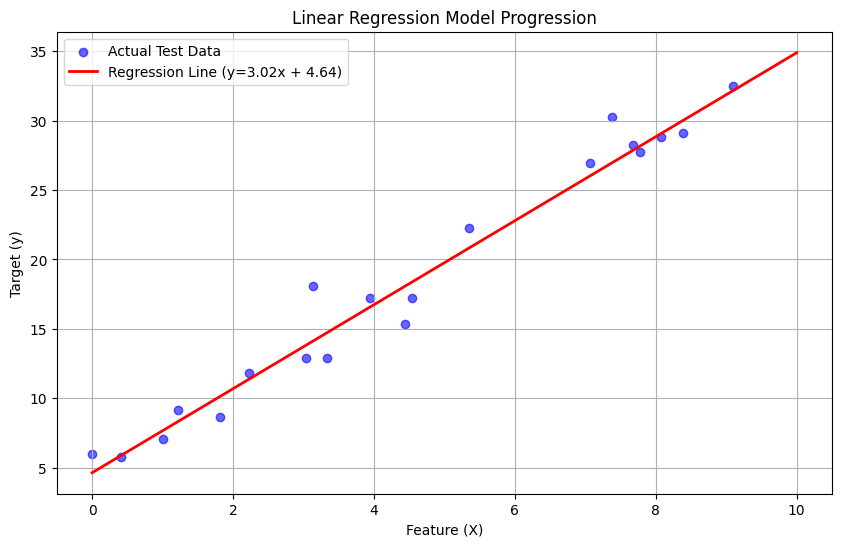

------------------------------
Linear regression task completed successfully, including visualization.


In [9]:
np.random.seed(42)
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)  
y = 3 * X.flatten() + 5 + np.random.normal(0, 2, n_samples)  

print("Data initialized. Shape of X:", X.shape)
print("-" * 30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
model = LinearRegression()
print("\nTraining Linear Regression model...")
model.fit(X_train, y_train)
print(f"Model Intercept (c): {model.intercept_:.2f}")
print(f"Model Coefficient (m): {model.coef_[0]:.2f}")
y_pred = model.predict(X_test)
print("Predictions complete.")
print("\n--- Model Evaluation ---")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Test Data', alpha=0.6)
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', linewidth=2, label=f'Regression Line (y={model.coef_[0]:.2f}x + {model.intercept_:.2f})')
plt.title('Linear Regression Model Progression')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.grid(True)
plt.show()

print("-" * 30)
print("Linear regression task completed successfully, including visualization.")

## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

<HR></HR>
<H3>PART 5 ANSWERS AND INSIGHT:</H3>
<HR></HR>

salary_prediction_visualization_fixed.png


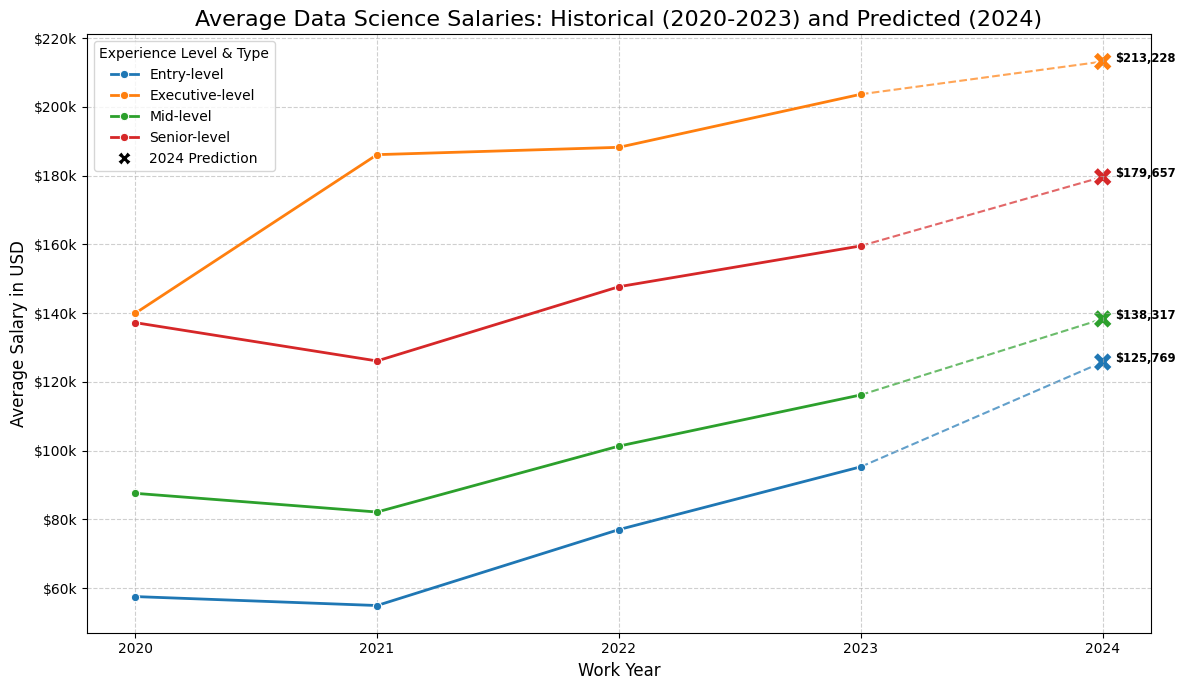

In [10]:
avg_salaries = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().reset_index()
avg_salaries_pivot = avg_salaries.pivot(index='work_year', columns='experience_level', values='salary_in_usd')
predicted_salaries_2024 = {}
for level in avg_salaries_pivot.columns:
    salaries = avg_salaries_pivot[level]

    growth_21_22 = (salaries.get(2022) - salaries.get(2021)) / salaries.get(2021) if 2021 in salaries.index and 2022 in salaries.index else None
    growth_22_23 = (salaries.get(2023) - salaries.get(2022)) / salaries.get(2022) if 2022 in salaries.index and 2023 in salaries.index else None

    growth_rates = [g for g in [growth_21_22, growth_22_23] if g is not None]

    if growth_rates:
        avg_growth_rate = sum(growth_rates) / len(growth_rates)
    else:
        avg_growth_rate = 0.0

    if 2023 in salaries.index:
        predicted_salary = salaries[2023] * (1 + avg_growth_rate)
        predicted_salaries_2024[level] = predicted_salary

historical_df = avg_salaries_pivot.reset_index().melt(
    id_vars='work_year',
    value_vars=avg_salaries_pivot.columns,
    var_name='experience_level',
    value_name='salary_in_usd'
)
historical_df['is_predicted'] = False

pred_2024_df_plot = pd.DataFrame({
    'work_year': 2024,
    'experience_level': predicted_salaries_2024.keys(),
    'salary_in_usd': predicted_salaries_2024.values(),
    'is_predicted': True
})

combined_df = pd.concat([historical_df, pred_2024_df_plot], ignore_index=True)

level_map = {
    'EN': 'Entry-level',
    'EX': 'Executive-level',
    'MI': 'Mid-level',
    'SE': 'Senior-level'
}
combined_df['experience_level_full'] = combined_df['experience_level'].map(level_map)
combined_df.dropna(subset=['salary_in_usd'], inplace=True)

plt.figure(figsize=(12, 7))
levels = sorted(combined_df['experience_level_full'].dropna().unique())
palette = sns.color_palette('tab10', n_colors=len(levels))
color_map = dict(zip(levels, palette))

sns.lineplot(
    data=combined_df[combined_df['work_year'] <= 2023],
    x='work_year',
    y='salary_in_usd',
    hue='experience_level_full',
    marker='o',
    linestyle='-',
    errorbar=None,
    palette=color_map,
    linewidth=2
)

sns.scatterplot(
    data=combined_df[combined_df['work_year'] == 2024],
    x='work_year',
    y='salary_in_usd',
    hue='experience_level_full',
    style='is_predicted',
    markers={True: 'X'},
    s=200,
    palette=color_map,
    legend=False
)

for level in levels:
    subset = combined_df[combined_df['experience_level_full'] == level].sort_values('work_year')
    if 2023 in subset['work_year'].values and 2024 in subset['work_year'].values:
        x_values = subset[subset['work_year'].isin([2023, 2024])]['work_year']
        y_values = subset[subset['work_year'].isin([2023, 2024])]['salary_in_usd']

        color = color_map.get(level)
        plt.plot(x_values, y_values, linestyle='--', color=color, linewidth=1.5, alpha=0.7, zorder=0)

for index, row in combined_df[combined_df['work_year'] == 2024].iterrows():
    plt.text(
        row['work_year'] + 0.05,
        row['salary_in_usd'],
        f'${int(row["salary_in_usd"]):,}',
        horizontalalignment='left',
        size='small',
        color='black',
        weight='semibold'
    )

plt.title('Average Data Science Salaries: Historical (2020-2023) and Predicted (2024)', fontsize=16)
plt.xlabel('Work Year', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)
plt.xticks(combined_df['work_year'].unique().astype(int))
plt.grid(True, linestyle='--', alpha=0.6)

prediction_legend = [Line2D([0], [0], marker='X', color='w', markerfacecolor='black', markersize=10, linestyle='None', label='2024 Prediction')]
h, l = plt.gca().get_legend_handles_labels()
plt.legend(handles=h + prediction_legend, labels=l + ['2024 Prediction'], title='Experience Level & Type', loc='upper left', frameon=True)
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: f'${int(x/1000):,}k'))
plt.tight_layout()
plt.savefig('salary_prediction_visualization_fixed.png')
print("salary_prediction_visualization_fixed.png")

In [11]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

<h3>ANSWERS:</h3>1. The model likely performs poorly because a simple Linear Regression relies on very limited features—mainly the year and experience level. This leaves out many important factors that influence salary, so it cannot capture the full picture.<br><br>2. The main issue is that salary depends on far more than just Location and Company Size. The model ignores crucial details, such as differences in pay across cities—e.g., a Data Scientist in San Francisco earns much more than someone in a smaller city despite similar experience. Larger, well-funded companies also tend to offer higher salaries than small startups.<br><br>3. To improve the model, we need to provide richer information and use a more suitable approach. This includes adding more relevant features, applying better encoding techniques, and choosing a stronger model.<br><br>4. R² only shows how well the model fits the data, but it doesn’t tell us the actual size of the prediction errors in real monetary terms.</h3>

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀